In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# set up a normalized grid:
dim= 20
xarray= np.arange(-dim,dim)
yarray= np.arange(-dim,dim)

# (fluid) flow from a source at L to a sink at -L:
L = dim/2
x,y = np.meshgrid(xarray,yarray)
vx = (x-L)/((x-L)**2+y**2) - (x+L)/((x+L)**2 +y**2)
vy = y/((x-L)**2+y**2) - y/((x+L)**2 +y**2)

<ipython-input-1-a4a91f31a654>:12: RuntimeWarning: invalid value encountered in true_divide
  vx = (x-L)/((x-L)**2+y**2) - (x+L)/((x+L)**2 +y**2)
<ipython-input-1-a4a91f31a654>:13: RuntimeWarning: invalid value encountered in true_divide
  vy = y/((x-L)**2+y**2) - y/((x+L)**2 +y**2)


In [2]:
# Masking the singularities at the poles:
threshold = 0.33
Mx = np.abs(vx) > threshold
My = np.abs(vy) > threshold
vx = np.ma.masked_array(vx, mask=Mx)
vy = np.ma.masked_array(vy, mask=My)

<ipython-input-2-ad7d9bb48aa4>:3: RuntimeWarning: invalid value encountered in greater
  Mx = np.abs(vx) > threshold
<ipython-input-2-ad7d9bb48aa4>:4: RuntimeWarning: invalid value encountered in greater
  My = np.abs(vy) > threshold


<IPython.core.display.Javascript object>


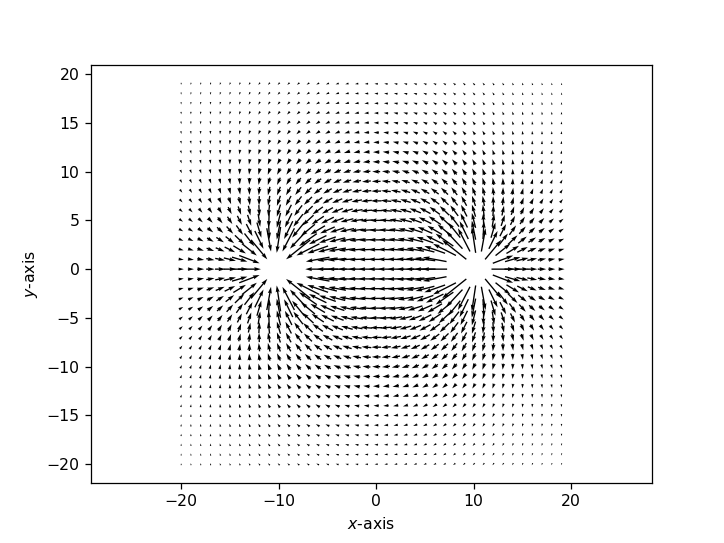

In [8]:
# plot the flow lines:
plt.figure()
plt.quiver(x,y, vx, vy, pivot='mid')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


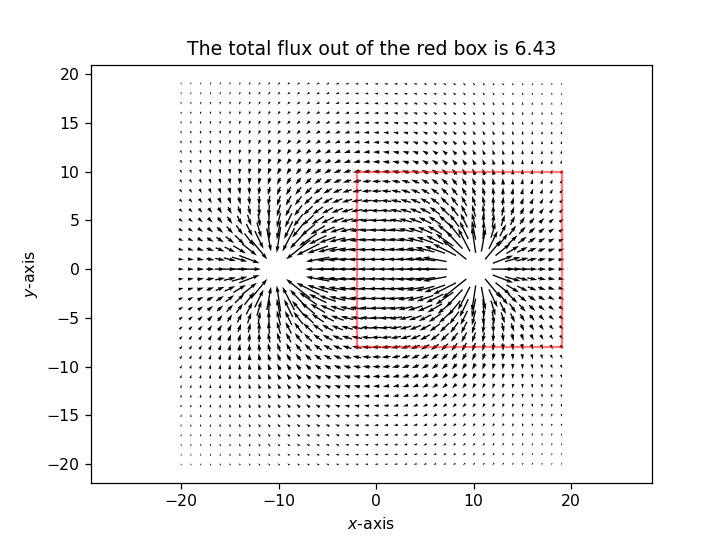

In [9]:
xmin=18
xmax=39
ymin=12
ymax=30

# total flux out the bottom and top:
topandbottomflux = -np.sum(vy[ymin,xmin:xmax+1])+np.sum(vy[ymax,xmin:xmax+1])

# total flux out the left and right side:
sideflux = -np.sum(vx[ymin:ymax+1,xmin])+np.sum(vx[ymin:ymax+1,xmax])

# net flux out of the box:
totalflux = sideflux + topandbottomflux

# plot flux and box:
plt.figure()
plt.title('The total flux out of the red box is {:.3}'.format(totalflux))
# the flux:
plt.quiver(x,y, vx, vy, pivot='mid')
# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymax,xmin:xmax+1],y[ymax,xmin:xmax+1],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmin],y[ymin:ymax+1,xmin],'r',alpha=0.5)
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5)
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()